In [347]:
import numpy as np
import pandas as pd
import gen_data
import regex as re
import seaborn as sns

t0_GDP = pd.read_csv('GDP_dat.csv').loc[:,['State','stateGDP_t0']]
t0_GDP.head()

,State,stateGDP_t0
0,California,3120386
1,Texas,1772132
2,New York,1705127
3,Florida,1111614
4,Illinois,875671


In [348]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [349]:
simDat = gen_data.sim_data(t0_GDP, **gen_data.sim_params)
treatment_years = simDat.loc[:,['State', 'treatment_year']].set_index('State')

In [350]:
treatment_years

,treatment_year
State,
Florida,5.0
Washington,6.0
Oklahoma,NaN
Vermont,NaN


In [351]:
simLong = simDat.drop(columns = 'treatment_year').set_index('State').unstack().reset_index()
simLong = simLong[simLong['level_0'].apply(lambda x: bool(re.search('pct', x)))]

In [352]:
simLong = simDat.drop(columns = 'treatment_year').set_index('State').unstack().reset_index()
simLong = simLong[simLong['level_0'].apply(lambda x: bool(re.search('pct', x)))]
simLong[simLong['level_0'].apply(lambda x: bool(re.search('pct', x)))]
simLong.loc[:,'t'] = simLong.loc[:,'level_0'].apply(
    lambda x: int(re.findall('\d*$', x)[0]))
simLong = simLong.drop(columns = 'level_0').rename(columns = {0:'deltaGDP_pct'})
simLong

,State,deltaGDP_pct,t
8,Florida,0.020239,1
9,Washington,0.020944,1
10,Oklahoma,0.020759,1
11,Vermont,0.020476,1
16,Florida,0.018587,2
17,Washington,0.021501,2
18,Oklahoma,0.019975,2
19,Vermont,0.018730,2
24,Florida,0.019832,3
25,Washington,0.021563,3


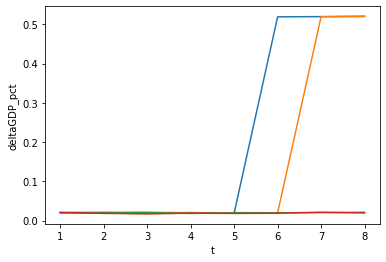

In [353]:
ax = sns.lineplot(data= simLong, x = 't', y = 'deltaGDP_pct', hue = 'State')
ax.get_legend().remove()

In [354]:
import fit_model
lm, data, baseline = fit_model.preprocess_dat(data=simLong,
                                    treatment_years=treatment_years,
                                    target = 'deltaGDP_pct',
                                    treat_dummy_type='state_variant')

In [355]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deltaGDP_pct   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.086e+05
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.81e-43
Time:                        12:56:39   Log-Likelihood:                 187.36
No. Observations:                  32   AIC:                            -348.7
Df Residuals:                      19   BIC:                            -329.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0146      0.000    106.149      0.000       0.014       0.015
state_Florida        0.0035      0.000      9.774      0.000       0.003       0.004
state_Oklahoma       0.0038      0.000     13.234      0.000       0.003       0.004
state_Vermont        0.0028      0.000      9.715      0.000       0.002       0.003
state_Washington     0.0044      0.000     13.690      0.000       0.004       0.005
t_1                  0.0024      0.000      5.508      0.000       0.001       0.003
t_2                  0.0015      0.000      3.406      0.003       0.001       0.002
t_3                  0.0015      0.000      3.564      0.002       0.001       0.002
t_4                  0.0012      0.000      2.843      0.010       0.000       0.002
t_5                  0.0012      0.000      2.761      0.012       0.000       0.002
t_6                  0.0013      0.000      3.027      0.007       0.000       0.002
t_7                  0.0027      0.000      5.560      0.000       0.002       0.004
t_8                  0.0028      0.000      5.733      0.000       0.002       0.004
d_Florida            0.4996      0.001    637.806      0.000       0.498       0.501
d_Washington         0.4980      0.001    568.642      0.000       0.496       0.500
==============================================================================
Omnibus:                        0.591   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.246
Skew:                          -0.215   Prob(JB):                        0.884
Kurtosis:                       3.008   Cond. No.                     4.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [356]:
treatment_years

,treatment_year
State,
Florida,5.0
Washington,6.0
Oklahoma,NaN
Vermont,NaN
